# Setting Up Reddit API Authentication

In [104]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/NegotiationPast5409"
reddit = praw.Reddit(
    client_id="IQleoMr_1Bq2UJbhG1ks-g",
    client_secret="gLrM8yfvJcq2L-wqXo3KROOICNEWyg",
    user_agent=user_agent
)

# Import Necessary libraries

In [105]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# Trending Topics on Selected Word

In [106]:
headlines = set()
for submission in reddit.subreddit("Taylorswift").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Megathread Hub
14sl7a7
aran130711
1688676194.0
504
0.99
https://www.reddit.com/r/TaylorSwift/comments/14sl7a7/megathread_hub/
0


# Selecting headlines of subreddits on selected topic

In [107]:
headlines = set()
for submission in reddit.subreddit("Taylorswift").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

585


# Creating a Data frame on the Reddit Data

In [108]:
swifties_df = pd.DataFrame(headlines)
swifties_df.head()

,0
0,[Spoilers] Tokyo Night 3 Surprise Song #1 (Feb...
1,"Guitar surprise song, Tokyo, night 2"
2,[Spoilers] Tokyo Night 4 Surprise Song #1 (Feb...
3,Tortured Poets Department Easter Eggs
4,Did Cruel Summer not being released as an orig...


In [109]:
swifties_df.columns

RangeIndex(start=0, stop=1, step=1)

# Renamining Columns to Titles

In [110]:

swifties_df.columns = ['Titles']
swifties_df.head()

,Titles
0,[Spoilers] Tokyo Night 3 Surprise Song #1 (Feb...
1,"Guitar surprise song, Tokyo, night 2"
2,[Spoilers] Tokyo Night 4 Surprise Song #1 (Feb...
3,Tortured Poets Department Easter Eggs
4,Did Cruel Summer not being released as an orig...


# Cleaning the retrieved content based on the regex Functions (Question 1 )

In [47]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
swifties_df["Titles"]= swifties_df["Titles"].apply(cleanTxt)

#Show the clean text
swifties_df.head()

,Titles
0,[Spoilers] Tokyo Night 3 Surprise Song 1 (Febr...
1,"Guitar surprise song, Tokyo, night 2"
2,[Spoilers] Tokyo Night 4 Surprise Song 1 (Febr...
3,Tortured Poets Department Easter Eggs
4,Did Cruel Summer not being released as an orig...


# Statistics of Data frame 

In [71]:
swifties_df.describe()

,num_tokens
count,587.000000
mean,5.967632
std,3.261207
min,1.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,22.000000


# Graphs on Describe (Question 2)

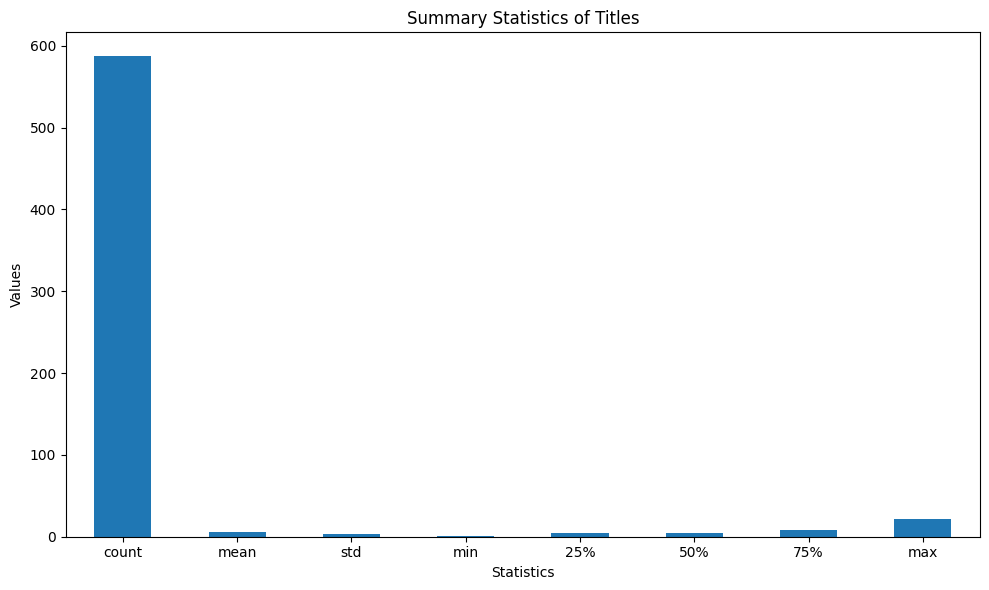

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting box plot using seaborn
summary_stats = swifties_df.describe()

# Plotting bar plot
plt.figure(figsize=(10, 6))
summary_stats.plot(kind="bar", ax=plt.gca(), legend=False)
plt.title("Summary Statistics of Titles")
plt.ylabel("Values")
plt.xlabel("Statistics")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Importing Stop Words

In [48]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"that'll", "weren't", 'yourself', 'you', 've', 'themselves', 'at', 'has', 'with', 's', "couldn't", 'by', 'what', "won't", 'hasn', 'an', 'below', 'nor', "wouldn't", "mightn't", 'himself', 'both', 'just', 'its', 'more', 'any', 'ain', 'hers', 'not', 'won', 'up', 'to', 'don', 'their', 'most', 'each', 'them', 'we', 'yourselves', "isn't", 'your', 'while', 'ma', 'it', 'did', 'between', 'then', 'very', 'my', 'when', 'she', "aren't", 'herself', "she's", 'hadn', 'if', 'the', 'haven', 'aren', "hadn't", 'on', 'how', 'who', 'against', "hasn't", 'because', 'for', 'and', 'are', 'isn', 'some', 'theirs', 'were', 'itself', 'under', 'again', 'i', 'our', 'about', "didn't", 'those', 'or', 're', 'being', 'am', 'was', 'only', 'mightn', "shouldn't", 'over', 'of', 'few', 'own', 'until', "don't", 'which', 'his', 'above', 'mustn', 'into', 'having', 'weren', 'him', 'he', 'off', 'can', 'd', 'myself', 'been', 'as', 'now', 'doesn', 'needn', 'in', "wasn't", 'out', 'does', 'o', "you'll", "doesn't", 'same', 'couldn', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [50]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Creating pipeline 

In [51]:
pipeline = [str.lower, tokenize, remove_stop]

In [52]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

# Running data frame through the pipeline

In [53]:
swifties_df["Tokens"] = swifties_df["Titles"].apply(prepare, pipeline = pipeline)

In [54]:
swifties_df.head()


,Titles,Tokens
0,[Spoilers] Tokyo Night 3 Surprise Song 1 (Febr...,"[spoilers, tokyo, night, surprise, song, febru..."
1,"Guitar surprise song, Tokyo, night 2","[guitar, surprise, song, tokyo, night]"
2,[Spoilers] Tokyo Night 4 Surprise Song 1 (Febr...,"[spoilers, tokyo, night, surprise, song, febru..."
3,Tortured Poets Department Easter Eggs,"[tortured, poets, department, easter, eggs]"
4,Did Cruel Summer not being released as an orig...,"[cruel, summer, released, original, single, co..."


# Create num_tokens column tour data frame 

In [56]:
swifties_df['num_tokens'] = swifties_df['Tokens'].map(len)
swifties_df.tail()

,Titles,Tokens,num_tokens
582,"Taylor Swift's Super Bowl Necklace Causes 1,04...","[taylor, swift, super, bowl, necklace, causes,...",9
583,anyone else want another lana feature?,"[anyone, else, want, another, lana, feature]",6
584,Made this for my work desk.,"[made, work, desk]",3
585,Opinion | Why Is Everything Suddenly Taylor Sw...,"[opinion, |, everything, suddenly, taylor, swi...",7
586,What Taylor Swift song has a bridge/outro that...,"[taylor, swift, song, bridge, outro, better, r...",8


#  Importing Counter to mark frequency(Question 3)

In [57]:
from collections import Counter

In [59]:
counter = Counter()
swifties_df['Tokens'].map(counter.update)
print(counter.most_common(5))

[('taylor', 253), ('swift', 115), ('tortured', 49), ('poets', 49), ('department', 44)]


In [60]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [61]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
taylor,253
swift,115
tortured,49
poets,49
department,44
super,43
bowl,42
made,42
album,42


In [62]:
freq_df.describe()

,freq
count,1392.000000
mean,2.516523
std,8.502109
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,253.000000


# Frequncy Graph 

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

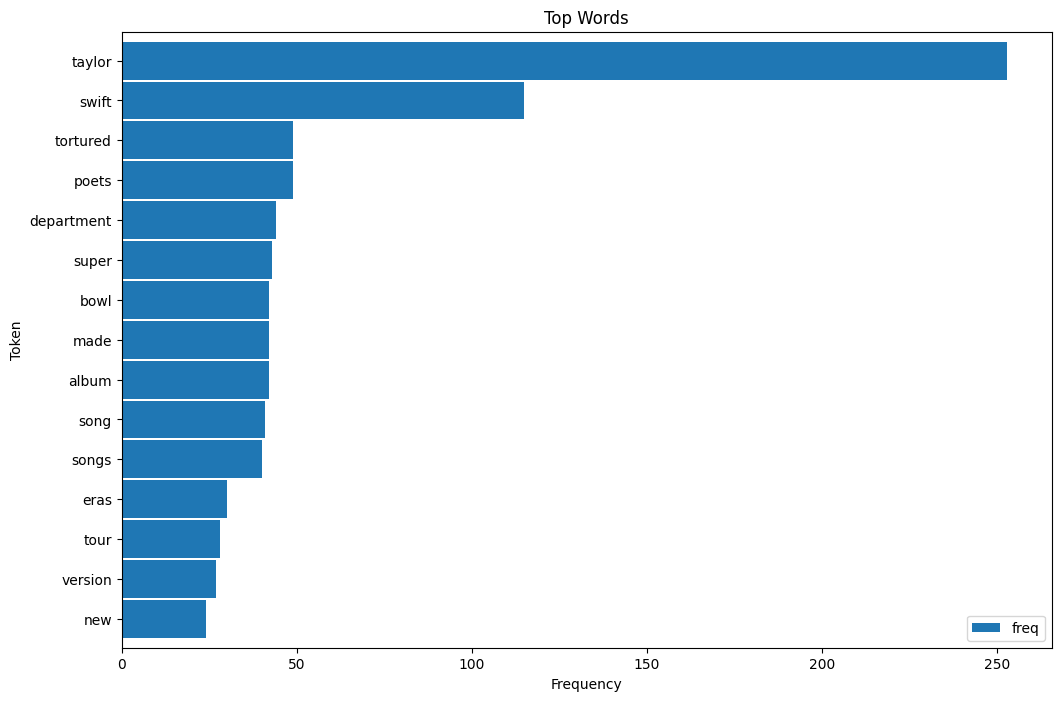

In [63]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# Worldcloud on data frame 

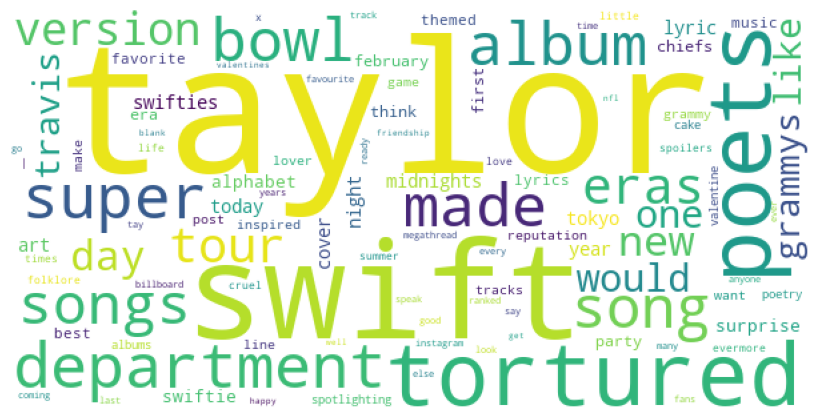

In [67]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 600, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Various Regex Function in our day to day life 

# 1. Email Address

In [72]:
import re

email_regex = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
print(re.match(email_regex, 'user@example.com'))  # Matched
print(re.match(email_regex, 'user@.com'))  # Unmatched


<re.Match object; span=(0, 16), match='user@example.com'>
None


# 2. Date Format 

In [73]:
date_regex = r'^\d{4}-\d{2}-\d{2}$'
print(re.match(date_regex, '2024-01-01'))  # Matched
print(re.match(date_regex, '24-01-01'))  # Unmatched


<re.Match object; span=(0, 10), match='2024-01-01'>
None


# 3. IP Address 

In [74]:
ip_regex = r'^(\d{1,3}\.){3}\d{1,3}$'
print(re.match(ip_regex, '127.0.0.1'))  # Matched
print(re.match(ip_regex, '256.100.100.100'))  # Unmatched


<re.Match object; span=(0, 9), match='127.0.0.1'>
<re.Match object; span=(0, 15), match='256.100.100.100'>


# 4. Phone number 

In [75]:
import re

# Define the regex for phone numbers with an optional extension
phone_regex = r'^\d{10}(?:\s*ext\s*\d+)?$'

# Examples
matched_example_1 = '1234567890 ext 123'
matched_example_2 = '1234567890'
unmatched_example = '1234567'  # Not enough digits

# Test the regex
print(re.match(phone_regex, matched_example_1))  # Expected: Match
print(re.match(phone_regex, matched_example_2))  # Expected: Match
print(re.match(phone_regex, unmatched_example))  # Expected: None (Unmatched)


<re.Match object; span=(0, 18), match='1234567890 ext 123'>
<re.Match object; span=(0, 10), match='1234567890'>
None


# 5. Json strings

In [76]:
json_kv_regex = r'^"\w+" *: *".*"$'
print(re.match(json_kv_regex, '"name": "John"'))  # Matched
print(re.match(json_kv_regex, 'name: John'))  # Unmatched


<re.Match object; span=(0, 14), match='"name": "John"'>
None


In [77]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Poloarity and insights 

In [79]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
swifties_df['Subjectivity'] = swifties_df['Titles'].apply(getSubjectivity)
swifties_df['Polarity'] = swifties_df['Titles'].apply(getPolarity)

#Now display data
swifties_df.head()

,Titles,Tokens,num_tokens,Subjectivity,Polarity
0,[Spoilers] Tokyo Night 3 Surprise Song 1 (Febr...,"[spoilers, tokyo, night, surprise, song, febru...",6,0.000000,0.000000
1,"Guitar surprise song, Tokyo, night 2","[guitar, surprise, song, tokyo, night]",5,0.000000,0.000000
2,[Spoilers] Tokyo Night 4 Surprise Song 1 (Febr...,"[spoilers, tokyo, night, surprise, song, febru...",6,0.000000,0.000000
3,Tortured Poets Department Easter Eggs,"[tortured, poets, department, easter, eggs]",5,0.000000,0.000000
4,Did Cruel Summer not being released as an orig...,"[cruel, summer, released, original, single, co...",9,0.591071,-0.149107


# Range of poloarity

In [81]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
swifties_df["Insight"] = swifties_df["Polarity"].apply(getInsight)

swifties_df.head(50)

,Titles,Tokens,num_tokens,Subjectivity,Polarity,Insight
0,[Spoilers] Tokyo Night 3 Surprise Song 1 (Febr...,"[spoilers, tokyo, night, surprise, song, febru...",6,0.000000,0.000000,Neutral
1,"Guitar surprise song, Tokyo, night 2","[guitar, surprise, song, tokyo, night]",5,0.000000,0.000000,Neutral
2,[Spoilers] Tokyo Night 4 Surprise Song 1 (Febr...,"[spoilers, tokyo, night, surprise, song, febru...",6,0.000000,0.000000,Neutral
3,Tortured Poets Department Easter Eggs,"[tortured, poets, department, easter, eggs]",5,0.000000,0.000000,Neutral
4,Did Cruel Summer not being released as an orig...,"[cruel, summer, released, original, single, co...",9,0.591071,-0.149107,Negative
5,The Era's tour (Amigurumi's version),"[era, tour, amigurumi, version]",4,0.000000,0.000000,Neutral
6,Any other 49er fan swifties out there?,"[49er, fan, swifties]",3,0.375000,-0.125000,Negative
7,Overwhelmed with learning all the songs before...,"[overwhelmed, learning, songs, eras, tour, adv...",8,0.100000,0.200000,Positive
8,Why is it such a big deal that she writes her ...,"[big, deal, writes, songs]",4,0.533333,0.200000,Positive
9,How Travis Kelce has handled Taylor Swift ques...,"[travis, kelce, handled, taylor, swift, questi...",8,0.666667,0.333333,Positive


# Sentiment Graph 

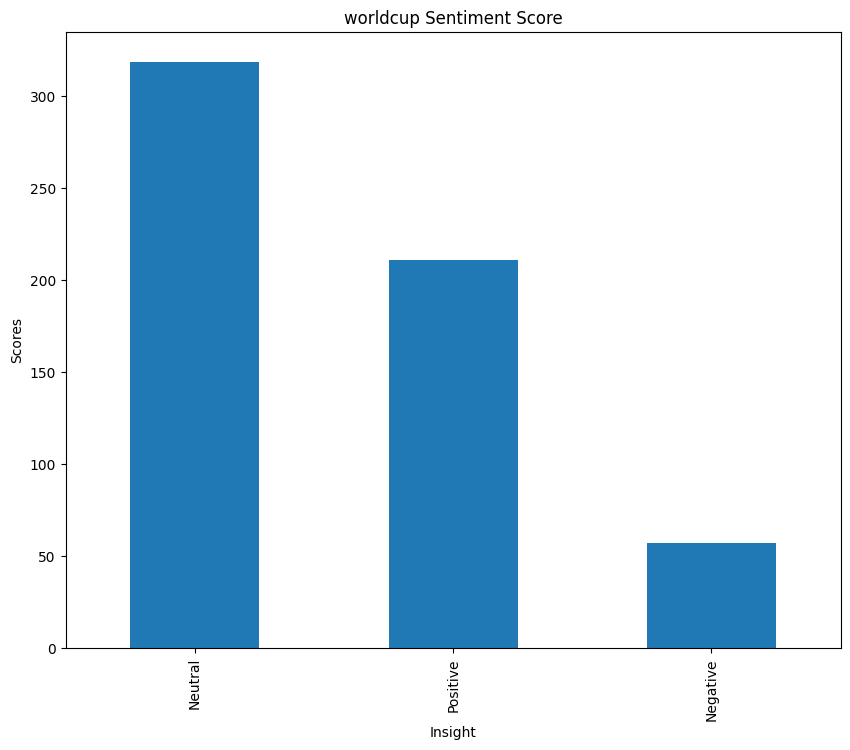

In [83]:
#Plot the values count of sentiment
plt.title("worldcup Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
swifties_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# World cloud on sentiment 

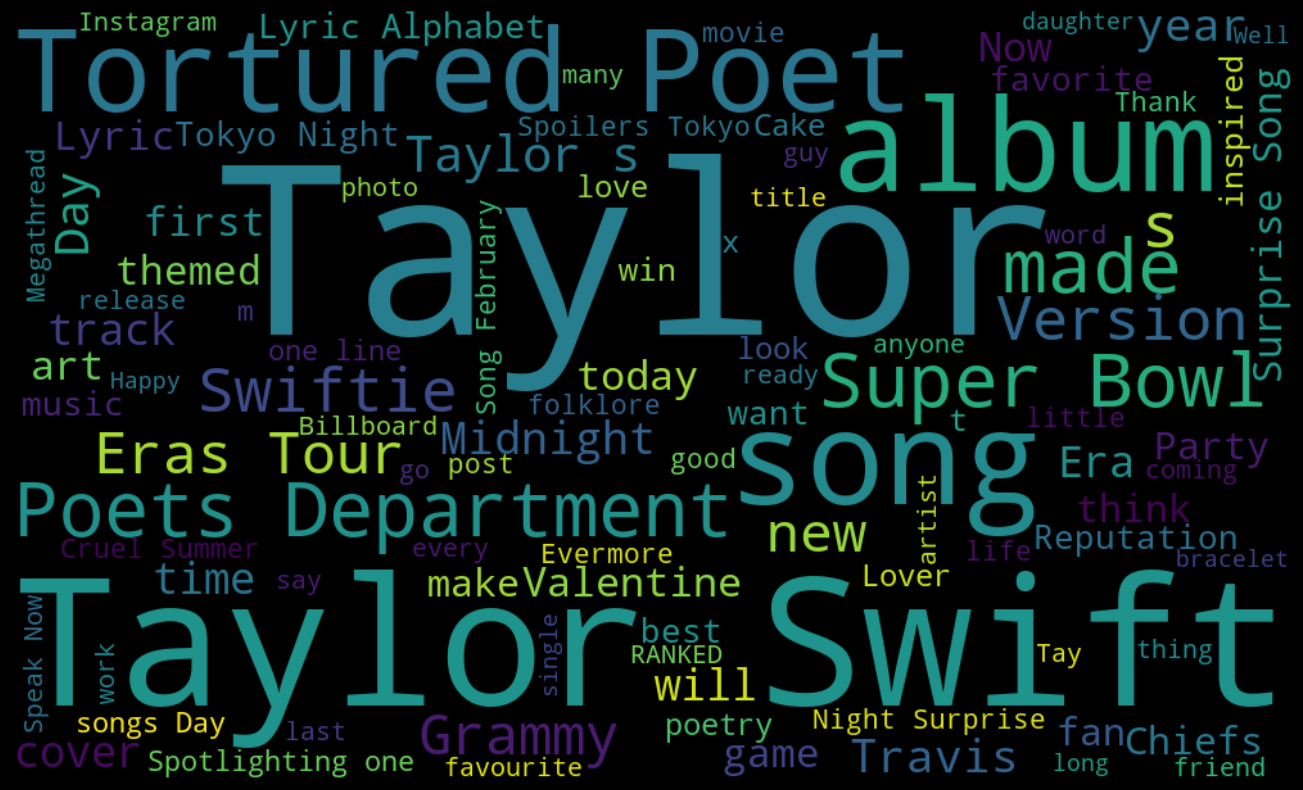

In [84]:
text = ' '.join( [twts for twts in swifties_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [85]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Get the Bing Liu lexicon

In [86]:
#Get the Bing Liu lexicon
from sklearn import preprocessing
import nltk
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words in opinion lexicon',
      opinion_lexicon.positive()[:10])
print('Examples of negative words in opinion lexicon',
      opinion_lexicon.negative()[:10])

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...


Total number of words in opinion lexicon 6789
Examples of positive words in opinion lexicon ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
Examples of negative words in opinion lexicon ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


# Create the “Dictionary

In [88]:

#Create the “Dictionary”
# Let's create a dictionary which we can use for scoring our review text
nltk.download('punkt')
swifties_df.rename(columns={"reviewText": "text"}, inplace=True)
pos_score = 1
neg_score = -1
word_dict = {}
 
# Adding the positive words to the dictionary
for word in opinion_lexicon.positive():
        word_dict[word] = pos_score
      
# Adding the negative words to the dictionary
for word in opinion_lexicon.negative():
        word_dict[word] = neg_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saimi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:

#Function to do the math
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score  

In [93]:

#Make sure all texts are non-empty and aretype text then call the function
swifties_df['Titles'].fillna('no review', inplace=True)
swifties_df['Bing_Liu_Score'] = swifties_df['Titles'].apply(bing_liu_score)

C:\Users\saimi\AppData\Local\Temp\ipykernel_50076\1546124685.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  swifties_df['Titles'].fillna('no review', inplace=True)


# Liu Score

In [96]:

#Let’s see the output
swifties_df[["Titles", 'Bing_Liu_Score']].head(10)

,Titles,Bing_Liu_Score
0,[Spoilers] Tokyo Night 3 Surprise Song 1 (Febr...,0
1,"Guitar surprise song, Tokyo, night 2",0
2,[Spoilers] Tokyo Night 4 Surprise Song 1 (Febr...,0
3,Tortured Poets Department Easter Eggs,-1
4,Did Cruel Summer not being released as an orig...,0
5,The Era's tour (Amigurumi's version),0
6,Any other 49er fan swifties out there?,0
7,Overwhelmed with learning all the songs before...,0
8,Why is it such a big deal that she writes her ...,0
9,How Travis Kelce has handled Taylor Swift ques...,2


In [99]:

#One more thing:
#Does the sentiment count match the “rating” given by thecustomers?


swifties_df.groupby('Titles').agg({'Bing_Liu_Score':'mean'})

,Bing_Liu_Score
Titles,
"""April 19 🤍"" Taylor via Instagram",0.0
"""Cruel Summer"" is now Taylor Swift's most streamed song of all-time on Spotify, surpassing ""Blank Space"".",0.0
"""Cruel Summer"" is now the best selling song from Taylor Swift's 'Lover' in the US by total units, surpassing ""Lover"".",2.0
"""I think I want the Chiefs to win just because Taylor Swift goes for them....and all of you complaining about Taylor being at the game, get a fvcking life"" - Adele",1.0
"15 years ago today, Taylor did her first Grammys performance by singing ""Fifteen"" with Miley Cyrus",0.0
...,...
“The Last Great American Dynasty” Charm Bracelet,2.0
“The Tortured Poets Department” logo concept,-1.0
“We are about to go on a little adventure together.” by artist Scott C.,0.0
